Name: **Syed Farhan Naqvi**<br>
Div: **BE11-Q11**<br>
Roll no: **43344**<br>
Title: **Assignment 4: ECG Anomaly detection using Autoencoders**<br>

In [1]:
#importing libraries and dataset
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

PATH_TO_DATA = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'

In [2]:
data = pd.read_csv(PATH_TO_DATA, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
#finding shape of the dataset
data.shape

(4998, 141)

In [4]:
#splitting training and testing dataset
features = data.drop(140, axis=1) # features won't be including the labvel column
target = data[140]                # target column will include the output label
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target)


In [5]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(3998, 140)
(1000, 140)
(3998,)
(1000,)


In [6]:
y_train.value_counts()

1.0    2335
0.0    1663
Name: 140, dtype: int64

In [7]:
y_train[y_train == 1].index

Int64Index([2480, 2743, 2468, 1568, 1255, 1190, 2861, 1377,  648,  612,
            ...
            1517, 1033, 3027, 2524,  531, 1282, 1285,  207, 1508, 2875],
           dtype='int64', length=2335)

In [8]:
x_train.loc[y_train[y_train == 1].index]

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
2480,0.402254,-0.326997,-1.980380,-2.867643,-3.766813,-3.810667,-2.909853,-2.075117,-1.770604,-1.148892,...,0.260212,0.506694,1.105608,1.644213,1.407485,1.656513,1.426276,1.047326,0.409920,0.386490
2743,-0.737792,-3.284542,-3.994817,-4.161855,-3.981828,-3.648892,-2.530091,-1.298728,-1.100279,-0.716721,...,0.964851,1.068137,1.263219,1.156163,1.078858,0.911169,0.874962,1.298681,0.483986,-2.248308
2468,-1.854532,-3.665224,-3.821190,-3.892253,-3.385126,-2.662742,-1.663274,-1.578599,-1.557796,-0.772445,...,1.438557,1.571171,1.072772,0.441950,-0.375244,-1.399691,-1.691615,-1.379189,-0.481297,-1.026239
1568,-2.160022,-3.777751,-4.285004,-4.036477,-3.308024,-2.133143,-1.523664,-1.452375,-0.682550,-0.404657,...,1.182154,1.105107,1.384214,1.575143,1.506016,1.170609,0.758034,0.633479,0.871299,0.149151
1255,-0.526821,-3.359393,-4.225134,-4.419806,-4.035850,-2.810712,-1.903804,-1.787840,-1.347151,-0.533522,...,0.490886,1.334494,1.454381,1.227361,1.039723,0.491605,0.208097,-0.025773,0.966789,0.147113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,1.300724,-0.342051,-2.803580,-4.604510,-4.807866,-3.893177,-2.849850,-1.782720,-1.545725,-0.948153,...,0.921387,1.062355,1.449464,1.993288,2.068895,1.327299,0.669203,0.571007,0.556075,-0.848775
1285,-1.739532,-3.248969,-3.657210,-4.268318,-3.758126,-3.235361,-2.267531,-1.588325,-1.444583,-1.162514,...,1.752538,1.656026,1.459578,1.092420,0.638151,0.154056,-0.137005,0.007240,0.334026,-0.546224
207,0.397353,-1.689315,-2.769892,-3.883630,-4.427945,-3.383584,-2.147434,-1.839171,-0.987413,-0.221549,...,0.029859,0.356162,1.261086,1.181552,1.447092,1.567084,1.271278,0.500697,0.076688,0.523165
1508,-1.893335,-3.414486,-3.625115,-4.069015,-3.914221,-3.598994,-2.427041,-1.588023,-1.255787,-0.799975,...,1.561700,1.621342,1.491683,1.010019,0.308562,-0.507561,-1.190060,-1.486352,-0.841450,-1.370900


In [9]:
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]


In [10]:
#scaling the data using MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [11]:
#creating autoencoder subclass by extending Model class from keras
class AutoEncoder(Model):
  def __init__(self, output_units, ldim=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(ldim, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [12]:
#model configuration
model = AutoEncoder(output_units=x_train_scaled.shape[1])
model.compile(loss='msle', metrics=['mse'], optimizer='adam')
epochs = 100

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=epochs,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/100
5/5 [==============================] - 17s 541ms/step - loss: 0.0104 - mse: 0.0235 - val_loss: 0.0126 - val_mse: 0.0293
Epoch 2/100
5/5 [==============================] - 0s 50ms/step - loss: 0.0102 - mse: 0.0230 - val_loss: 0.0125 - val_mse: 0.0290
Epoch 3/100
5/5 [==============================] - 0s 68ms/step - loss: 0.0097 - mse: 0.0219 - val_loss: 0.0122 - val_mse: 0.0284
Epoch 4/100
5/5 [==============================] - 0s 66ms/step - loss: 0.0090 - mse: 0.0202 - val_loss: 0.0121 - val_mse: 0.0281
Epoch 5/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0081 - mse: 0.0182 - val_loss: 0.0118 - val_mse: 0.0275
Epoch 6/100
5/5 [==============================] - 0s 55ms/step - loss: 0.0073 - mse: 0.0164 - val_loss: 0.0114 - val_mse: 0.0264
Epoch 7/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0066 - mse: 0.0147 - val_loss: 0.0111 - val_mse: 0.0258
Epoch 8/100
5/5 [==============================] - 0s 73ms/step - loss: 0.0059 - mse: 0.

5/5 [==============================] - 0s 60ms/step - loss: 0.0027 - mse: 0.0059 - val_loss: 0.0080 - val_mse: 0.0186
Epoch 64/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0026 - mse: 0.0059 - val_loss: 0.0080 - val_mse: 0.0187
Epoch 65/100
5/5 [==============================] - 0s 90ms/step - loss: 0.0026 - mse: 0.0058 - val_loss: 0.0079 - val_mse: 0.0184
Epoch 66/100
5/5 [==============================] - 0s 66ms/step - loss: 0.0026 - mse: 0.0059 - val_loss: 0.0080 - val_mse: 0.0186
Epoch 67/100
5/5 [==============================] - 0s 69ms/step - loss: 0.0026 - mse: 0.0058 - val_loss: 0.0080 - val_mse: 0.0185
Epoch 68/100
5/5 [==============================] - 0s 67ms/step - loss: 0.0026 - mse: 0.0058 - val_loss: 0.0080 - val_mse: 0.0185
Epoch 69/100
5/5 [==============================] - 0s 82ms/step - loss: 0.0026 - mse: 0.0058 - val_loss: 0.0079 - val_mse: 0.0185
Epoch 70/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0026 - mse: 0.0057 - 

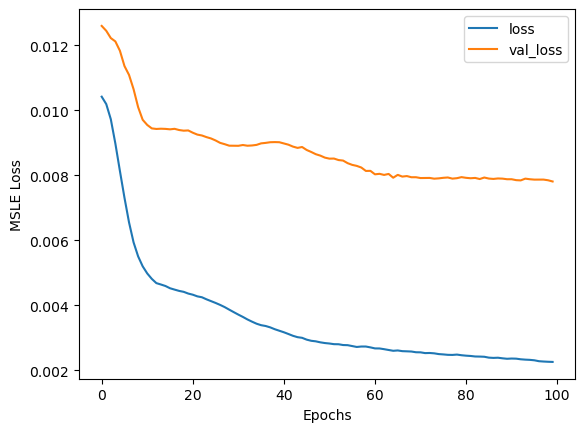

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [14]:
#finding threshold for anomaly and doing predictions
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  threshold = np.mean(reconstruction_errors.numpy()) \
   + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")


73/73 [==============================] - 2s 6ms/step
Threshold: 0.00458298231738169


In [15]:
#getting accuracy score
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)

32/32 [==============================] - 0s 6ms/step


0.952